<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Qubit by Qubit</h1>
<h2 style="text-align: center;">Introduction to Quantum Computing</h1>
<h3>Week 19 - Grover's Algorithm</h3>
<h3>Lab notebook version 2</h3>

</div>

# Introduction

Ihis notebook, we will implement Grover's Algorithm using Qiskit's Grover function. The circuit for Grover's algorithm can get really complicated, as your TA discussed with you in lab. Therefore, instead of creating the circuit gate-by-gate, we are going to use a built-in function to make the circuit for us. This approach will allow us to focus on defining the size of the problem.

First, as usual, let's import the libraries we will need. You will notice some new libraries here - `AmplificationProblem`, `Grover`, and `Statevector`. These will all be used to implement Grover's Algorithm. We will describe what each library is used for when we use them.

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.algorithms import AmplificationProblem
from qiskit.algorithms import Grover
import math
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Libraries Imported Successfully!


## Part 1 - Defining the size of the problem

In this part, we will set up the search problem by specifying the number of choices we are searching through, and the choice we are searching for. Remember that in a search problem, we know what we are looking for - we just don't know where it is located.

In the code below, we create a list called `data` to store the items we want to search through. We have to make sure that the number of choices we use is a power of 2, otherwise later code will produce errors. We recommend starting with 8 choices.

Create a second variable named `correct_choice`, and give it the item you are searching for. So, for example, if you wanted to search for 3, you would write `correct_choice = 3'.

In [3]:
# Block 1 - Create the variables data and correct_choice.
# THIS BLOCK IS IMPORTANT - YOU HAVE TO FILL IN CODE IN THIS BLOCK TO COMPLETE IT 
# 
data = [1,5,7,4,3,2,0,6] # This is the dataset you want to search through

correct_choice = 2 # Choice number you are searching for

### Question - For the number of choices you entered, how many qubits would be needed in Grover's algorithm?

## Part 2 - Setting up the Grover problem

In this part, we will use Qiskit's `AmplificationProblem` and `Grover` functions to set up Grover's search. `AmplificationProblem` sets up the oracle and defines the search problem. `Grover` solves the search problem by applying Grover's algorithm to it.

First, we will define the search problem using `AmplificationProblem`. To do this, we have to create the Oracle. Remember from lecture that the Oracle flips the sign of the correct state. So, to create the oracle, we need to specify the correct state. Note that this oracle is different from the one in the lab 19 notebook - it searches for the actual number you want to find, and not its position.


After we have created the oracle, we use it as a paramter in the `AmplificationProblem` function to create the search problem.

The block below first creates the oracle, and then uses it to create the search problem. You don't need to enter any code here - just run the block.

In [4]:
# Block 3 - Defining the grover problem using the AmplificationProblem function
# In this step we define the problem we want to solve.
# We use the correct choice to create the oracle matrix
# The AmplificationProblem function defines the grover problem
# YOU DO NOT NEED TO FILL IN ANY CODE HERE - JUST EXECUTE THE BLOCK

sol = bin(data.index(correct_choice))[2:].zfill(3) # This is the item we are searching for
oracle = Statevector.from_label(sol) # Creating the oracle matrix.
problem = AmplificationProblem(oracle)

Next, we will solve the search problem using Qiskit's `Grover` function. `Grover` needs two inputs - the number of iterations of the algorithm that you want to apply, and the backend you want to use.

In the block below, we want to use the QASM simulator as the backend. To start off, we want to run 0 iterations of Grover's algorithm, i.e., we do not apply Grover's algorithm. Later, we will increase the number of iterations of Grover's algorithm and see how the measurement probabilities of different choices change!

In [5]:
# Block 4 - Solving the Grover problem using the Grover function
# Here we use the Grover function we had introduced in lab to solve the problem we had defined in the previous block
# THIS BLOCK IS IMPORTANT - YOU HAVE TO FILL IN CODE IN THIS BLOCK TO COMPLETE IT
backend = Aer.get_backend('qasm_simulator')# Enter the QASM simulator here
grover = Grover(iterations=2, quantum_instance=backend) # Enter the number of iterations here
result = grover.amplify(problem) # This line of code applies Grover's algorithm to the problem and gets the result

## Part 3 - Visualizing the results of Grover's algorithm

In the final part of implementing Grover's, we will extract the results from running the algorithm and plot the results. The results will be shown in the form of the measurement probabilities of all the different choices. 

In the block below, the code is filled in. Just run the block and see what you get!

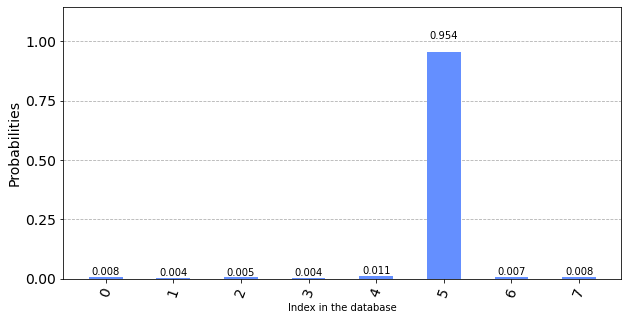

In [6]:
# Block 5 - Plotting the results of Grover's algorithm
# YOU DO NOT NEED TO FILL IN ANY CODE HERE - JUST EXECUTE THE BLOCK

# Extracting probabilities from the result of solving Grover
counts = result.circuit_results[0]
counts = counts.int_outcomes()

# NB: CORRECT_CHOICE = 5 IS AT INDEX 1

# Plotting probabilities 
# Don't worry about all the details of how the plot is made
# All the code after the first line just makes the plot look nice
plot = plot_histogram(counts,figsize=(10, 5))
ax = plot.gca()
xticks = []
ax.set_xlabel("Index in the database")
display(plot)

### Question - What probabilities did you get, with iterations = 0? Does the result make sense?

You will notice that the probability of the correct choice increases as you increase the number of iterations! This is amplitude amplification in action.